# Preprocessing
### Data Understandng

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/Data.csv')

In [ ]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,NaN,35.0,58000.0,Yes
6,France,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [ ]:
dataset.shape

(10, 4)

In [ ]:
dataset.isnull().sum()

Country      1
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
100 * dataset.isnull().sum() / len(dataset)

Country      10.0
Age          10.0
Salary       10.0
Purchased     0.0
dtype: float64

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Counts', 1 : 'Percentage'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage', ascending=False).round(1)
            
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(dataset)

,Missing Counts,Percentage
Country,1,10.0
Age,1,10.0
Salary,1,10.0


In [ ]:
dataset.describe().round(2)

,Age,Salary
count,9.00,9.00
mean,38.78,63777.78
std,7.69,12265.58
min,27.00,48000.00
25%,35.00,54000.00
50%,38.00,61000.00
75%,44.00,72000.00
max,50.00,83000.00


In [ ]:
dataset['Country'].describe()

count          9
unique         3
top       France
freq           4
Name: Country, dtype: object

In [ ]:
# Drop the rows with the missing values
dataset.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Drop the variables with the missing values
d = dataset.dropna(axis=1)
d

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


### Imputing/Filling the missing values using fillna() method

In [ ]:
dataset["Country"].fillna("France", inplace = True) 
dataset["Age"].fillna("39", inplace = True) 
dataset["Salary"].fillna("63778", inplace = True) 
dataset

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,63778,Yes
5,France,35,58000,Yes
6,France,39,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [ ]:
dataset.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

### Imputing missing values using fillna() - using the imputation strategy

In [ ]:
# Importing the dataset
import pandas as pd
dataset_1 = pd.read_csv('/content/sample_data/Data.csv')
dataset_1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,NaN,35.0,58000.0,Yes
6,France,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
dataset_1.isnull().sum()

Country      1
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
dataset_1['Country'].value_counts()

France     4
Germany    3
Spain      2
Name: Country, dtype: int64

In [ ]:
dataset_1.fillna(dataset_1.mean(), inplace=True)
dataset_1 = dataset_1.fillna(dataset_1['Country'].value_counts().index[0])
dataset_1 = dataset_1.round()
dataset_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,France,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Imputing missing values using Imputer from Sklearn

In [ ]:
# Importing the dataset
import pandas as pd
dataset_2 = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab3 - Data Preprocessing/Data.csv')
dataset_2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,NaN,35.0,58000.0,Yes
6,France,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#### Simple Imputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [ ]:
# Taking care of missing data
import numpy as np
from sklearn.impute import SimpleImputer
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset_2[['Age', 'Salary']] = imputer_1.fit_transform(dataset_2[['Age', 'Salary']])

imputer_2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataset_2[['Country']] = imputer_2.fit_transform(dataset_2[['Country']])
dataset_2 = dataset_2.round()
dataset_2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,France,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Assign IV and TV

In [ ]:
X = dataset[['Country', 'Age', 'Salary']]
Y = dataset['Purchased']

In [ ]:
X

,Country,Age,Salary
0,France,44,72000
1,Spain,27,48000
2,Germany,30,54000
3,Spain,38,61000
4,Germany,40,63778
5,France,35,58000
6,France,39,52000
7,France,48,79000
8,Germany,50,83000
9,France,37,67000


In [ ]:
Y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

### Label Encoding --------------------------

In [ ]:
# Importing the dataset
import pandas as pd
dataset_2 = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab3 - Data Preprocessing/Data.csv')
dataset_2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,NaN,35.0,58000.0,Yes
6,France,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Imputing missing values
dataset_2.fillna(dataset_2.mean(), inplace=True)
dataset_2['Country'] = dataset_2.fillna(dataset_2['Country'].value_counts().index[0])
dataset_2 = dataset_2.round()
dataset_2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,France,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Encoding categorical data. NOTE: The missing values must be imputed if any found in the dataset
# Encoding the Independent Variable
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset_2['Country'] = labelencoder.fit_transform(dataset_2['Country'])
dataset_2['Purchased'] = labelencoder.fit_transform(dataset_2['Purchased'])
dataset_2

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,0
1,2,27.0,48000.0,1
2,1,30.0,54000.0,0
3,2,38.0,61000.0,0
4,1,40.0,63778.0,1
5,0,35.0,58000.0,1
6,0,39.0,52000.0,0
7,0,48.0,79000.0,1
8,1,50.0,83000.0,0
9,0,37.0,67000.0,1


**The label encoding can also be done after assignign the IV & TV**

Encoding the Input and Target Variable

X_2 = dataset_2[['Country', 'Age', 'Salary']]

Y_2 = dataset_2['Purchased']

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

X_2['Country'] = labelencoder_X.fit_transform(X_2['Country'])

X_2

labelencoder_Y = LabelEncoder()

Y_2 = labelencoder_Y.fit_transform(Y_2)

Y_2

**Challenges with Label Encoding**

In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

This is something that we do not want! So how can we overcome this obstacle? Here comes the concept of **One-Hot Encoding**.

### Factorization using Pandas -----------------------

In [ ]:
# Importing the dataset
import pandas as pd
dataset_F = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab3 - Data Preprocessing/Data.csv')
dataset_F

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,NaN,35.0,58000.0,Yes
6,France,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Imputing missing values
dataset_F.fillna(dataset_F.mean(), inplace=True)
dataset_F['Country'] = dataset_F.fillna(dataset_F['Country'].value_counts().index[0])
dataset_F = dataset_F.round()
dataset_F

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,France,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
dataset_F['Country'] = pd.factorize(dataset_F['Country'])[0]
dataset_F['Purchased'] = pd.factorize(dataset_F['Purchased'])[0]
dataset_F

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,0
1,1,27.0,48000.0,1
2,2,30.0,54000.0,0
3,1,38.0,61000.0,0
4,2,40.0,63778.0,1
5,0,35.0,58000.0,1
6,0,39.0,52000.0,0
7,0,48.0,79000.0,1
8,2,50.0,83000.0,0
9,0,37.0,67000.0,1


**Challenges with Label Encoding**

In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

This is something that we do not want! So how can we overcome this obstacle? Here comes the concept of **One-Hot Encoding**.

### One Hot Encoding ----------------------

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

**Using get_dummies() from Pandas**

The Countries column contain categorical values. We can convert the values in the Countries column into one-hot encoded vectors using the get_dummies() function:

In [ ]:
# Importing the dataset
import pandas as pd
dataset_d = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab3 - Data Preprocessing/Data.csv')
dataset_d

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,NaN,35.0,58000.0,Yes
6,France,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Imputing missing values
dataset_d.fillna(dataset_d.mean(), inplace=True)
dataset_d['Country'] = dataset_d.fillna(dataset_d['Country'].value_counts().index[0])
dataset_d = dataset_d.round()
dataset_d

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,France,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
pd.get_dummies(data = dataset_d, columns = ['Country', 'Purchased'])

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1,0,0,1,0
1,27.0,48000.0,0,0,1,0,1
2,30.0,54000.0,0,1,0,1,0
3,38.0,61000.0,0,0,1,1,0
4,40.0,63778.0,0,1,0,0,1
5,35.0,58000.0,1,0,0,0,1
6,39.0,52000.0,1,0,0,1,0
7,48.0,79000.0,1,0,0,0,1
8,50.0,83000.0,0,1,0,1,0
9,37.0,67000.0,1,0,0,0,1


**One Hot Encoding using Sklearn**

In [ ]:
# Importing the dataset
import pandas as pd
dataset_one = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab3 - Data Preprocessing/Data.csv')
dataset_one

FileNotFoundError: ignored

In [ ]:
# Imputing missing values
dataset_one.fillna(dataset_one.mean(), inplace=True)
dataset_one['Country'] = dataset_one.fillna(dataset_one['Country'].value_counts().index[0])
dataset_one = dataset_one.round()
dataset_one

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,France,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

onehot = onehotencoder.fit_transform(dataset_one.Country.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(onehot, columns = ["Country_"+str(int(i)) for i in range(onehot.shape[1])]) 

dataset_one = pd.concat([dataset_one, dfOneHot], axis=1)

dataset_one = dataset_one.drop(['Country'], axis=1) 

dataset_one

,Age,Salary,Purchased,Country_0,Country_1,Country_2
0,44.0,72000.0,No,1.0,0.0,0.0
1,27.0,48000.0,Yes,0.0,0.0,1.0
2,30.0,54000.0,No,0.0,1.0,0.0
3,38.0,61000.0,No,0.0,0.0,1.0
4,40.0,63778.0,Yes,0.0,1.0,0.0
5,35.0,58000.0,Yes,1.0,0.0,0.0
6,39.0,52000.0,No,1.0,0.0,0.0
7,48.0,79000.0,Yes,1.0,0.0,0.0
8,50.0,83000.0,No,0.0,1.0,0.0
9,37.0,67000.0,Yes,1.0,0.0,0.0


### Feature Scaling

In many machine learning algorithms, to bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model.

The most common techniques of feature scaling are **Normalization** and **Standardization**.

Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. 

Reference:
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

**Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution.

In [ ]:
X_tr

,Age,Salary,Country_0,Country_1,Country_2
5,35.0,58000.0,1.0,0.0,0.0
8,50.0,83000.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,1.0
1,27.0,48000.0,0.0,0.0,1.0
6,39.0,52000.0,1.0,0.0,0.0
9,37.0,67000.0,1.0,0.0,0.0
2,30.0,54000.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_tr)
X_train_norm = norm.transform(X_tr)
X_test_norm = norm.transform(X_te)

In [ ]:
X_train_norm

array([[0.34782609, 0.28571429, 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 1.        , 0.        ],
       [0.47826087, 0.37142857, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.52173913, 0.11428571, 1.        , 0.        , 0.        ],
       [0.43478261, 0.54285714, 1.        , 0.        , 0.        ],
       [0.13043478, 0.17142857, 0.        , 1.        , 0.        ]])

In [ ]:
X_test_norm

array([[0.56521739, 0.4508    , 0.        , 1.        , 0.        ],
       [0.73913043, 0.68571429, 1.        , 0.        , 0.        ],
       [0.91304348, 0.88571429, 1.        , 0.        , 0.        ]])

**Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[-0.23036965, -0.2236068 ,  1.15470054, -0.63245553, -0.63245553],
       [ 1.96861337,  2.07822788, -0.8660254 ,  1.58113883, -0.63245553],
       [ 0.20942695,  0.05261336, -0.8660254 , -0.63245553,  1.58113883],
       [-1.40316059, -1.14434067, -0.8660254 , -0.63245553,  1.58113883],
       [ 0.35602582, -0.77604712,  1.15470054, -0.63245553, -0.63245553],
       [ 0.06282809,  0.60505369,  1.15470054, -0.63245553, -0.63245553],
       [-0.96336399, -0.59190035, -0.8660254 ,  1.58113883, -0.63245553]])

In [ ]:
X_test

array([[ 0.50262469,  0.30839323, -0.8660254 ,  1.58113883, -0.63245553],
       [ 1.08902016,  1.06542062,  1.15470054, -0.63245553, -0.63245553],
       [ 1.67541563,  1.70993434,  1.15470054, -0.63245553, -0.63245553]])

### Data Split

In [ ]:
X = dataset_one[['Age', 'Salary', 'Country_0', 'Country_1', 'Country_2']] # Input Variables
y = dataset_one['Purchased'] # Target Variable

In [ ]:
X

,Age,Salary,Country_0,Country_1,Country_2
0,44.0,72000.0,1.0,0.0,0.0
1,27.0,48000.0,0.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,1.0
4,40.0,63778.0,0.0,1.0,0.0
5,35.0,58000.0,1.0,0.0,0.0
6,39.0,52000.0,1.0,0.0,0.0
7,48.0,79000.0,1.0,0.0,0.0
8,50.0,83000.0,0.0,1.0,0.0
9,37.0,67000.0,1.0,0.0,0.0


In [ ]:
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

X_tr, X_te, Y_tr, Y_te = train_test_split(X, y, test_size=0.30, random_state=123)

In [ ]:
X_train

,Age,Salary,Country_0,Country_1,Country_2
5,35.0,58000.0,1.0,0.0,0.0
8,50.0,83000.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,1.0
1,27.0,48000.0,0.0,0.0,1.0
6,39.0,52000.0,1.0,0.0,0.0
9,37.0,67000.0,1.0,0.0,0.0
2,30.0,54000.0,0.0,1.0,0.0


In [ ]:
Y_train

5    Yes
8     No
3     No
1    Yes
6     No
9    Yes
2     No
Name: Purchased, dtype: object

### Class Balancing

Oversampling using SMOTE

In [ ]:
data_1 = pd.read_csv('/content/telecom_churn.csv')
import seaborn as sns
sns.countplot(x = data_1['Churn'])

In [ ]:
data_1 = data_1.drop(['State', 'International plan', 'Voice mail plan'], axis = 1)

In [ ]:
x = data_1.drop('Churn', axis = 1)
y = data_1['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x, y)

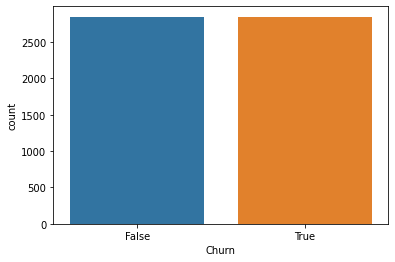

In [ ]:
sns.countplot(x = y_b)

Undersampling using Near Miss

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x, y)

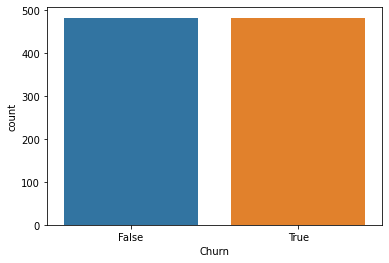

In [ ]:
sns.countplot(x = y_nm)

### Homework

Select you preferred datset. Any other dataset with around 10-15 variables.
 1. Perform EDA
 2. Perform Preprocessing
 